# Health Care Project

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset
health_data = pd.read_csv('1645792390_cep1_dataset.csv')

In [3]:
health_data.head() #Extracting top 5 rows of data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
health_data.tail() #Extracting bottom 5 rows of data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
health_data.shape #Evaluating the shape(Rows, Columns)

(303, 14)

In [6]:
health_data.info() #Extracting the information of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
health_data.describe() #Extracting the general statistical criteras of dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
health_data.columns #Extracting the columns names of dataset

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [9]:
health_data.isnull().sum() #Checking for the null values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
#Checking if our dataset is balanced
health_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

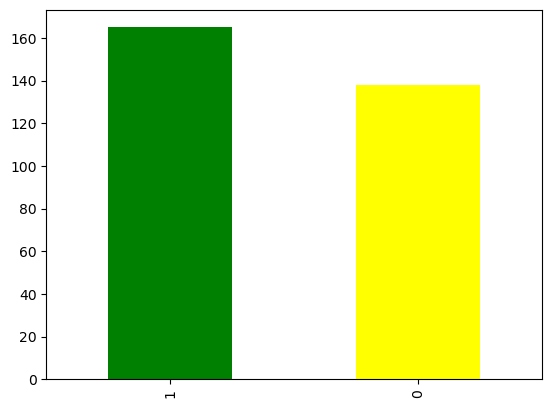

In [26]:
#here 1 = male; 0 = female
health_data["target"].value_counts().plot(kind='bar', color=["green","yellow"])
plt.show()

In [12]:
#Creating feature and Dependent variabe sets
X = health_data.iloc[:,:-1] #all the row , all columns except last one
y = health_data.iloc[:,-1] #all rows and the last column

In [13]:
X.shape

(303, 13)

In [14]:
y.shape

(303,)

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=90)

In [16]:
from sklearn.ensemble import RandomForestClassifier


In [17]:
#Instanciating class to obj
rclf = RandomForestClassifier(criterion='gini',max_depth=7, n_estimators=100,random_state=5) 

In [18]:
rclf.fit(X_train,y_train)

RandomForestClassifier(max_depth=7, random_state=5)

In [19]:
#feature importances
rclf.feature_importances_

array([0.08304076, 0.01581108, 0.15361364, 0.07054868, 0.07464994,
       0.00738674, 0.01935261, 0.10792509, 0.05140065, 0.12874262,
       0.06231756, 0.08722058, 0.13799003])

In [20]:
#displaying features
health_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [21]:
#generating the predictions
y_pred = rclf.predict(X_test)

In [22]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [23]:
#Accuracy of our random forest classifier
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[22,  9],
       [ 8, 37]], dtype=int64)

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7763157894736842

In [25]:
#Cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(rclf,X_train,y_train,cv=10)

array([0.86956522, 0.7826087 , 0.82608696, 0.86956522, 0.7826087 ,
       0.86956522, 0.86956522, 0.77272727, 0.81818182, 0.81818182])